In [20]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Import data

In [21]:
# df_raw = pd.read_csv("wdbc.csv", header=None)
df_raw = pd.read_csv("./annthyroid.csv", header=None)

df_raw

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000,1
1,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625,1
2,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750,1
3,0.656250,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688,1
4,0.229167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,0.604167,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0.004717,0.113092,0.128763,0.379630,0.121875,1
7086,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.200000,0.030641,0.005017,0.333333,0.005469,-1
7087,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0.001434,0.109192,0.147157,0.231481,0.206250,1
7088,0.354167,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0.005283,0.109192,0.147157,0.333333,0.154688,1


In [22]:
df_raw[21].loc[df_raw[21] == -1] = 0
df_raw

C:\Users\Rongavilla\AppData\Local\Temp\ipykernel_19400\46608714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw[21].loc[df_raw[21] == -1] = 0


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000,1
1,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625,1
2,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750,1
3,0.656250,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688,1
4,0.229167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,0.604167,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0.004717,0.113092,0.128763,0.379630,0.121875,1
7086,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.200000,0.030641,0.005017,0.333333,0.005469,0
7087,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0.001434,0.109192,0.147157,0.231481,0.206250,1
7088,0.354167,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0.005283,0.109192,0.147157,0.333333,0.154688,1


In [23]:
y = pd.get_dummies(df_raw[21])

y

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
7085,0,1
7086,1,0
7087,0,1
7088,0,1


In [24]:
x = df_raw.iloc[:,:-1]
x = (x - x.min()) / (x.max() - x.min())

x.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.750000,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.001132,0.080780,0.197324,0.300926,0.225000
1,0.239583,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000472,0.164345,0.235786,0.537037,0.165625
2,0.479167,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.003585,0.130919,0.167224,0.527778,0.118750
3,0.656250,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.001698,0.091922,0.125418,0.337963,0.129688
4,0.229167,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000472,0.142061,0.229097,0.337963,0.235938


## Train test split

In [25]:
x_raw, x_test, y_raw, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [26]:
zero_count = y_raw[0][y_raw[0] == 1].count()
one_count = y_raw[1][y_raw[1] == 1].count()

print('The number of 0 in the training set is: {}'.format(zero_count))
print('The number of 1 in the training set is: {}'.format(one_count))

to_generate = one_count-zero_count
print('Goal: Generate {} datasets for 0.'.format(to_generate))

The number of 0 in the training set is: 428
The number of 1 in the training set is: 5244
Goal: Generate 4816 datasets for 0.


In [27]:
x_missing = x_raw[y_raw[0] == 1]
x_missing.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
5398,0.750000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.028302,0.108635,0.130435,0.305556,0.146875
2900,0.708333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.020925,0.069638,0.143813,0.402778,0.126563
5002,0.489583,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.137736,0.125348,0.142140,0.439815,0.118750
2827,0.281250,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.194340,0.113092,0.105351,0.458333,0.084375
4652,0.843750,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.011698,0.080780,0.162207,0.337963,0.168750


## Variational Autoencoder

In [28]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, num_features=8, num_dim=21):
        super(VariationalAutoencoder, self).__init__()
        
        self.num_features = num_features
        self.num_dim = num_dim
        
        self.encoder_layer_1 = nn.Linear(in_features=self.num_dim, out_features=14)
        self.encoder_layer_2 = nn.Linear(in_features=14, out_features=(self.num_features * 2))
        
        self.decoder_layer_1 = nn.Linear(in_features=self.num_features, out_features=14)
        self.decoder_layer_2 = nn.Linear(in_features=14, out_features=self.num_dim)
        
        self.relu = nn.ReLU() # hidden layers
        self.sigmoid = nn.Sigmoid() # output layer
        
    def reparameterize(self, mu, log_var):
        """
        :param mu: mean from the encoder's latent space
        :param log_var: log variance from the encoder's latent space
        """
        std = torch.exp(0.5*log_var) # standard deviation
        eps = torch.randn_like(std)  # `randn_like` as we need the same size
        sample = mu + (eps * std)    # sampling as if coming from the input space
        
        return sample
    
    def encode(self, x):
        # encoding
        #x = F.relu(self.encoder_layer_1(x))
        x = self.encoder_layer_1(x)
        x = self.relu(x)
        x = self.encoder_layer_2(x).view(-1, 2, self.num_features)
        
        # get `mu` and `log_var`
        mu = x[:, 0, :] # the first feature values as mean
        log_var = x[:, 1, :] # the other feature values as variance
        
        # get the latent vector through reparameterization
        z = self.reparameterize(mu, log_var)
        
        return z, mu, log_var
    
    def decode(self, z, mu, log_var):
        # decoding
        #x = F.relu(self.decoder_layer_1(z))
        x = self.decoder_layer_1(z)
        x = self.relu(x)
        
        #reconstruction = torch.sigmoid(self.decoder_layer_2(x))
        reconstruction = self.decoder_layer_2(x)
        reconstruction = self.sigmoid(reconstruction)
        
        return reconstruction, mu, log_var
    
    # Utility function to generate new data based on:
    # mu: The average that you want to have (should be the same size as num_features)
    # log_var: The variance that you want to have (should be the same size as num_features)
    def sample(self, mu, log_var):
        z = self.reparameterize(mu, log_var)
        reconstruction, mu, log_var = self.decode(z, mu, log_var)
        
        return reconstruction
        
    
    def forward(self, x):
        
        z, mu, log_var = self.encode(x)
        reconstruction, mu, log_var = self.decode(z, mu, log_var)
        
        return reconstruction, mu, log_var

In [29]:
# Custom dataset to treat how the model picks an x, y combination from the dataset
class AutoencoderDataset(Dataset):
    def __init__(self, x):
        self.x = x
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.x[index]

In [30]:
# The final loss is a combination of the reconstruction loss (first argument) and the loss from an assumed distribution (i.e. Normal / Gaussian distribution)
def final_loss(bce_loss, mu, logvar):
    """
    This function will add the reconstruction loss (BCELoss) and the 
    KL-Divergence.
    KL-Divergence = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    :param bce_loss: recontruction loss
    :param mu: the mean from the latent vector
    :param logvar: log variance from the latent vector
    """
    BCE = bce_loss 
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [31]:
num_features = 8
model = VariationalAutoencoder(num_features=num_features)

In [32]:
learning_rate = 0.0001
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 5

In [33]:
def train_fn(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        reconstruction, mu, logvar = model.forward(data)
        
        loss = loss_fn(reconstruction, targets)
        
        loss = final_loss(loss, mu, logvar)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

In [34]:
x_missing = torch.Tensor(np.array(x_missing))

# use Dataloader for Autoencoder 
custom_dataset = AutoencoderDataset(x_missing)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [35]:
epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_fn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    torch.save(state, "variational-autoencoder.pth")

Epoch: 0


100%|██████████| 86/86 [00:00<00:00, 300.30it/s, loss=1.17]


Ave Loss: 1.6659989592640898
Epoch: 1


100%|██████████| 86/86 [00:00<00:00, 438.49it/s, loss=1]   


Ave Loss: 1.3649247621381007
Epoch: 2


100%|██████████| 86/86 [00:00<00:00, 440.25it/s, loss=0.902]


Ave Loss: 1.1118607278480086
Epoch: 3


100%|██████████| 86/86 [00:00<00:00, 451.17it/s, loss=0.815]


Ave Loss: 0.9400712813055793
Epoch: 4


100%|██████████| 86/86 [00:00<00:00, 456.44it/s, loss=0.724]


Ave Loss: 0.8273812553217245
Epoch: 5


100%|██████████| 86/86 [00:00<00:00, 449.10it/s, loss=0.681]


Ave Loss: 0.7493171684963759
Epoch: 6


100%|██████████| 86/86 [00:00<00:00, 406.71it/s, loss=0.641]


Ave Loss: 0.69328661020412
Epoch: 7


100%|██████████| 86/86 [00:00<00:00, 478.26it/s, loss=0.632]


Ave Loss: 0.6539307229740675
Epoch: 8


100%|██████████| 86/86 [00:00<00:00, 474.38it/s, loss=0.617]


Ave Loss: 0.6289566062217535
Epoch: 9


100%|██████████| 86/86 [00:00<00:00, 468.62it/s, loss=0.582]


Ave Loss: 0.6109436805858168
Epoch: 10


100%|██████████| 86/86 [00:00<00:00, 453.17it/s, loss=0.584]


Ave Loss: 0.5948625463385915
Epoch: 11


100%|██████████| 86/86 [00:00<00:00, 440.75it/s, loss=0.602]


Ave Loss: 0.5810918045598407
Epoch: 12


100%|██████████| 86/86 [00:00<00:00, 449.13it/s, loss=0.612]


Ave Loss: 0.5674758941628212
Epoch: 13


100%|██████████| 86/86 [00:00<00:00, 466.28it/s, loss=0.529]


Ave Loss: 0.5534093920574632
Epoch: 14


100%|██████████| 86/86 [00:00<00:00, 471.39it/s, loss=0.563]


Ave Loss: 0.5365710480268612
Epoch: 15


100%|██████████| 86/86 [00:00<00:00, 447.03it/s, loss=0.542]


Ave Loss: 0.520743824714838
Epoch: 16


100%|██████████| 86/86 [00:00<00:00, 449.32it/s, loss=0.49] 


Ave Loss: 0.5102164662161539
Epoch: 17


100%|██████████| 86/86 [00:00<00:00, 437.78it/s, loss=0.484]


Ave Loss: 0.49705063187798787
Epoch: 18


100%|██████████| 86/86 [00:00<00:00, 483.36it/s, loss=0.51] 


Ave Loss: 0.48564002680224044
Epoch: 19


100%|██████████| 86/86 [00:00<00:00, 437.26it/s, loss=0.474]


Ave Loss: 0.4666432745234911
Epoch: 20


100%|██████████| 86/86 [00:00<00:00, 464.95it/s, loss=0.464]


Ave Loss: 0.4579733724510947
Epoch: 21


100%|██████████| 86/86 [00:00<00:00, 461.15it/s, loss=0.44] 


Ave Loss: 0.4457390353430149
Epoch: 22


100%|██████████| 86/86 [00:00<00:00, 388.21it/s, loss=0.459]


Ave Loss: 0.4380365544280341
Epoch: 23


100%|██████████| 86/86 [00:00<00:00, 471.24it/s, loss=0.427]


Ave Loss: 0.42178170105745627
Epoch: 24


100%|██████████| 86/86 [00:00<00:00, 475.79it/s, loss=0.435]


Ave Loss: 0.41234492319960925
Epoch: 25


100%|██████████| 86/86 [00:00<00:00, 445.20it/s, loss=0.402]


Ave Loss: 0.4010173099678616
Epoch: 26


100%|██████████| 86/86 [00:00<00:00, 467.05it/s, loss=0.393]


Ave Loss: 0.3934387675551481
Epoch: 27


100%|██████████| 86/86 [00:00<00:00, 450.08it/s, loss=0.41] 


Ave Loss: 0.3799564585436222
Epoch: 28


100%|██████████| 86/86 [00:00<00:00, 455.29it/s, loss=0.392]


Ave Loss: 0.37853617342405543
Epoch: 29


100%|██████████| 86/86 [00:00<00:00, 484.29it/s, loss=0.38] 


Ave Loss: 0.36702798410903575
Epoch: 30


100%|██████████| 86/86 [00:00<00:00, 439.16it/s, loss=0.398]


Ave Loss: 0.35575096378492754
Epoch: 31


100%|██████████| 86/86 [00:00<00:00, 422.14it/s, loss=0.335]


Ave Loss: 0.3455791948146598
Epoch: 32


100%|██████████| 86/86 [00:00<00:00, 405.40it/s, loss=0.379]


Ave Loss: 0.3406266843856767
Epoch: 33


100%|██████████| 86/86 [00:00<00:00, 425.81it/s, loss=0.332]


Ave Loss: 0.3328702087665713
Epoch: 34


100%|██████████| 86/86 [00:00<00:00, 479.09it/s, loss=0.365]


Ave Loss: 0.32955912032792734
Epoch: 35


100%|██████████| 86/86 [00:00<00:00, 450.64it/s, loss=0.367]


Ave Loss: 0.32350670528966324
Epoch: 36


100%|██████████| 86/86 [00:00<00:00, 485.40it/s, loss=0.35] 


Ave Loss: 0.3144003385028174
Epoch: 37


100%|██████████| 86/86 [00:00<00:00, 454.97it/s, loss=0.329]


Ave Loss: 0.30642069858867066
Epoch: 38


100%|██████████| 86/86 [00:00<00:00, 426.99it/s, loss=0.338]


Ave Loss: 0.2991024153523667
Epoch: 39


100%|██████████| 86/86 [00:00<00:00, 440.60it/s, loss=0.354]


Ave Loss: 0.2945626953313517
Epoch: 40


100%|██████████| 86/86 [00:00<00:00, 481.72it/s, loss=0.331]


Ave Loss: 0.29332091087518736
Epoch: 41


100%|██████████| 86/86 [00:00<00:00, 458.71it/s, loss=0.304]


Ave Loss: 0.28601808655400607
Epoch: 42


100%|██████████| 86/86 [00:00<00:00, 477.09it/s, loss=0.324]


Ave Loss: 0.2843999160930168
Epoch: 43


100%|██████████| 86/86 [00:00<00:00, 449.82it/s, loss=0.311]


Ave Loss: 0.2802716843610586
Epoch: 44


100%|██████████| 86/86 [00:00<00:00, 438.91it/s, loss=0.308]


Ave Loss: 0.27719396006229313
Epoch: 45


100%|██████████| 86/86 [00:00<00:00, 468.29it/s, loss=0.296]


Ave Loss: 0.2723393396929253
Epoch: 46


100%|██████████| 86/86 [00:00<00:00, 461.68it/s, loss=0.299]


Ave Loss: 0.2698511720396752
Epoch: 47


100%|██████████| 86/86 [00:00<00:00, 467.58it/s, loss=0.307]


Ave Loss: 0.2634352747091027
Epoch: 48


100%|██████████| 86/86 [00:00<00:00, 442.00it/s, loss=0.294]


Ave Loss: 0.264123548082141
Epoch: 49


100%|██████████| 86/86 [00:00<00:00, 445.48it/s, loss=0.325]


Ave Loss: 0.2617186846774678
Epoch: 50


100%|██████████| 86/86 [00:00<00:00, 438.67it/s, loss=0.298]


Ave Loss: 0.2584400932456172
Epoch: 51


100%|██████████| 86/86 [00:00<00:00, 483.87it/s, loss=0.303]


Ave Loss: 0.2571634813103565
Epoch: 52


100%|██████████| 86/86 [00:00<00:00, 442.85it/s, loss=0.294]


Ave Loss: 0.2537989872832631
Epoch: 53


100%|██████████| 86/86 [00:00<00:00, 476.53it/s, loss=0.295]


Ave Loss: 0.25254574435394866
Epoch: 54


100%|██████████| 86/86 [00:00<00:00, 428.26it/s, loss=0.276]


Ave Loss: 0.25017627917749935
Epoch: 55


100%|██████████| 86/86 [00:00<00:00, 396.50it/s, loss=0.29] 


Ave Loss: 0.24837629011897153
Epoch: 56


100%|██████████| 86/86 [00:00<00:00, 471.77it/s, loss=0.291]


Ave Loss: 0.24769919920106268
Epoch: 57


100%|██████████| 86/86 [00:00<00:00, 468.77it/s, loss=0.303]


Ave Loss: 0.2478017507250919
Epoch: 58


100%|██████████| 86/86 [00:00<00:00, 478.48it/s, loss=0.27] 


Ave Loss: 0.2443763059239055
Epoch: 59


100%|██████████| 86/86 [00:00<00:00, 456.47it/s, loss=0.278]


Ave Loss: 0.24428552389144897
Epoch: 60


100%|██████████| 86/86 [00:00<00:00, 423.44it/s, loss=0.274]


Ave Loss: 0.24126841127872467
Epoch: 61


100%|██████████| 86/86 [00:00<00:00, 468.14it/s, loss=0.265]


Ave Loss: 0.24043270876241285
Epoch: 62


100%|██████████| 86/86 [00:00<00:00, 457.68it/s, loss=0.273]


Ave Loss: 0.2374341311149819
Epoch: 63


100%|██████████| 86/86 [00:00<00:00, 468.84it/s, loss=0.259]


Ave Loss: 0.23829712614763615
Epoch: 64


100%|██████████| 86/86 [00:00<00:00, 471.60it/s, loss=0.278]


Ave Loss: 0.23658329491005387
Epoch: 65


100%|██████████| 86/86 [00:00<00:00, 441.17it/s, loss=0.309]


Ave Loss: 0.2376591909763425
Epoch: 66


100%|██████████| 86/86 [00:00<00:00, 442.74it/s, loss=0.268]


Ave Loss: 0.23575669960227125
Epoch: 67


100%|██████████| 86/86 [00:00<00:00, 470.21it/s, loss=0.281]


Ave Loss: 0.23566793754350307
Epoch: 68


100%|██████████| 86/86 [00:00<00:00, 458.72it/s, loss=0.249]


Ave Loss: 0.23335478558789852
Epoch: 69


100%|██████████| 86/86 [00:00<00:00, 442.28it/s, loss=0.263]


Ave Loss: 0.23462164783200554
Epoch: 70


100%|██████████| 86/86 [00:00<00:00, 464.28it/s, loss=0.273]


Ave Loss: 0.23381146216808363
Epoch: 71


100%|██████████| 86/86 [00:00<00:00, 447.93it/s, loss=0.265]


Ave Loss: 0.23406690948231276
Epoch: 72


100%|██████████| 86/86 [00:00<00:00, 440.38it/s, loss=0.289]


Ave Loss: 0.23426322864238605
Epoch: 73


100%|██████████| 86/86 [00:00<00:00, 464.19it/s, loss=0.277]


Ave Loss: 0.23185268876164458
Epoch: 74


100%|██████████| 86/86 [00:00<00:00, 457.03it/s, loss=0.262]


Ave Loss: 0.23064721860857898
Epoch: 75


100%|██████████| 86/86 [00:00<00:00, 468.36it/s, loss=0.273]


Ave Loss: 0.23089453127495077
Epoch: 76


100%|██████████| 86/86 [00:00<00:00, 473.92it/s, loss=0.308]


Ave Loss: 0.23057133046000503
Epoch: 77


100%|██████████| 86/86 [00:00<00:00, 418.27it/s, loss=0.256]


Ave Loss: 0.22964458496764648
Epoch: 78


100%|██████████| 86/86 [00:00<00:00, 425.33it/s, loss=0.261]


Ave Loss: 0.2284532366103904
Epoch: 79


100%|██████████| 86/86 [00:00<00:00, 351.71it/s, loss=0.282]


Ave Loss: 0.22935043829818105
Epoch: 80


100%|██████████| 86/86 [00:00<00:00, 398.04it/s, loss=0.263]


Ave Loss: 0.2279784606639729
Epoch: 81


100%|██████████| 86/86 [00:00<00:00, 433.42it/s, loss=0.262]


Ave Loss: 0.22809677276500437
Epoch: 82


100%|██████████| 86/86 [00:00<00:00, 351.97it/s, loss=0.249]


Ave Loss: 0.22808935891750248
Epoch: 83


100%|██████████| 86/86 [00:00<00:00, 396.29it/s, loss=0.252]


Ave Loss: 0.2273944914340973
Epoch: 84


100%|██████████| 86/86 [00:00<00:00, 349.10it/s, loss=0.262]


Ave Loss: 0.22763228866943094
Epoch: 85


100%|██████████| 86/86 [00:00<00:00, 347.96it/s, loss=0.261]


Ave Loss: 0.22679632139760394
Epoch: 86


100%|██████████| 86/86 [00:00<00:00, 363.15it/s, loss=0.265]


Ave Loss: 0.22790107581504557
Epoch: 87


100%|██████████| 86/86 [00:00<00:00, 378.77it/s, loss=0.251]


Ave Loss: 0.22615024915268256
Epoch: 88


100%|██████████| 86/86 [00:00<00:00, 411.56it/s, loss=0.276]


Ave Loss: 0.2262886232414911
Epoch: 89


100%|██████████| 86/86 [00:00<00:00, 394.99it/s, loss=0.272]


Ave Loss: 0.2270331417405328
Epoch: 90


100%|██████████| 86/86 [00:00<00:00, 405.83it/s, loss=0.264]


Ave Loss: 0.22564063810331877
Epoch: 91


100%|██████████| 86/86 [00:00<00:00, 384.12it/s, loss=0.266]


Ave Loss: 0.22504976617042408
Epoch: 92


100%|██████████| 86/86 [00:00<00:00, 410.80it/s, loss=0.293]


Ave Loss: 0.22648296418578126
Epoch: 93


100%|██████████| 86/86 [00:00<00:00, 404.78it/s, loss=0.274]


Ave Loss: 0.22743721739497297
Epoch: 94


100%|██████████| 86/86 [00:00<00:00, 423.07it/s, loss=0.254]


Ave Loss: 0.2241708962030189
Epoch: 95


100%|██████████| 86/86 [00:00<00:00, 406.10it/s, loss=0.279]


Ave Loss: 0.22608317278845366
Epoch: 96


100%|██████████| 86/86 [00:00<00:00, 369.19it/s, loss=0.244]


Ave Loss: 0.22444700588320576
Epoch: 97


100%|██████████| 86/86 [00:00<00:00, 416.21it/s, loss=0.259]


Ave Loss: 0.22439042288203573
Epoch: 98


100%|██████████| 86/86 [00:00<00:00, 400.11it/s, loss=0.281]


Ave Loss: 0.2242289100622022
Epoch: 99


100%|██████████| 86/86 [00:00<00:00, 416.69it/s, loss=0.256]

Ave Loss: 0.22492332617903865


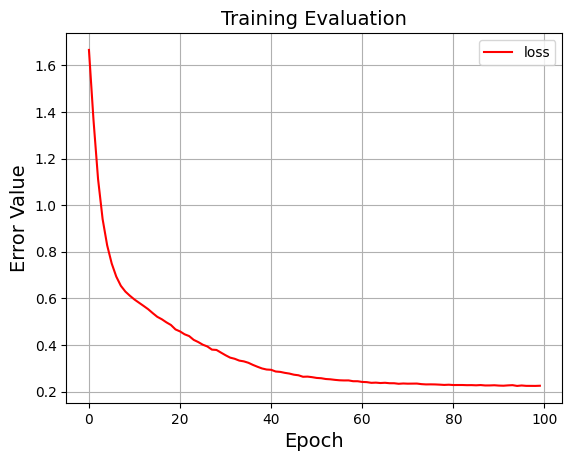

In [36]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [37]:
# Create a vector of zero tensors representing 0 average per num_feature (right in the middle of the dist)
sampled_mu = torch.Tensor([np.zeros(num_features)])

# Create a vector of zero tensors representing 0 standard deviations away from the mean to create variations
# Change this is you want to sample away from the mean to create "off-quality" data
sampled_logvar = torch.Tensor([np.zeros(num_features)])

sampled_logvar.shape

C:\Users\Rongavilla\AppData\Local\Temp\ipykernel_19400\2826375446.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:233.)
  sampled_mu = torch.Tensor([np.zeros(num_features)])


torch.Size([1, 8])

In [38]:
reconstruction = model.sample(sampled_mu, sampled_logvar)
reconstruction

tensor([[0.5408, 0.7832, 0.9508, 0.9858, 0.9922, 0.9288, 0.9938, 0.9862, 0.9753,
         0.8362, 0.9344, 0.9819, 0.9943, 0.9468, 0.9912, 0.9631, 0.0823, 0.1037,
         0.1743, 0.3944, 0.1444]], grad_fn=<SigmoidBackward0>)

In [39]:
x_fab = x_raw
x_fab

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
2707,0.510417,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.004340,0.108635,0.209030,0.444444,0.173438
5398,0.750000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.028302,0.108635,0.130435,0.305556,0.146875
4281,0.614583,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.004377,0.109192,0.186104,0.365741,0.180875
6768,0.656250,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.001057,0.097493,0.147157,0.287037,0.175000
2836,0.385417,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.003566,0.111978,0.182575,0.379630,0.171984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.572917,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000377,0.111978,0.220736,0.398148,0.200000
5192,0.739583,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.002642,0.109192,0.177258,0.361111,0.175000
3980,0.385417,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.002830,0.175487,0.224080,0.342593,0.229688
235,0.500000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000189,0.013928,0.050167,0.162037,0.090625


In [42]:
added_m_data = []

for i in range(to_generate):
    reconstruction = model.sample(sampled_mu, sampled_logvar)
    reconstruction = added_m_data.append(reconstruction[0].detach().cpu().numpy())

col_name = [x for x in range(0, 21)]
x_added = pd.DataFrame(added_m_data, columns=col_name)
x_added

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.606780,0.818484,0.996789,0.998934,0.999475,0.995891,0.999933,0.997701,0.995391,0.962915,...,0.999353,0.999918,0.997725,0.999878,0.998156,0.020480,0.021457,0.059792,0.341579,0.055466
1,0.580273,0.849612,0.972217,0.992619,0.993301,0.975243,0.994895,0.987472,0.990527,0.879395,...,0.991503,0.995998,0.966399,0.996183,0.987227,0.051334,0.046672,0.093138,0.368847,0.100020
2,0.562247,0.750371,0.918686,0.976081,0.980736,0.938199,0.987357,0.980401,0.961560,0.851059,...,0.976762,0.984647,0.932489,0.977247,0.944809,0.088092,0.128199,0.186410,0.402511,0.162600
3,0.575588,0.731225,0.958497,0.987594,0.990177,0.968600,0.994860,0.975201,0.979150,0.792534,...,0.985433,0.993880,0.969577,0.994137,0.981959,0.058319,0.098128,0.160436,0.401752,0.136039
4,0.575753,0.786442,0.929183,0.970597,0.981102,0.942701,0.984959,0.975835,0.976468,0.849664,...,0.976589,0.984034,0.941607,0.977117,0.951324,0.092414,0.099082,0.151433,0.388351,0.129462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,0.580733,0.830452,0.966683,0.981308,0.986558,0.966809,0.992561,0.966433,0.976364,0.843398,...,0.988135,0.995695,0.951360,0.995888,0.980846,0.091893,0.072316,0.114093,0.389372,0.139226
4812,0.549437,0.751886,0.956587,0.981358,0.984300,0.970934,0.994405,0.974678,0.967106,0.831706,...,0.993121,0.996327,0.964202,0.996118,0.981758,0.066331,0.100421,0.122299,0.380968,0.126737
4813,0.562664,0.824325,0.991001,0.994051,0.996786,0.982950,0.995018,0.996607,0.996481,0.882165,...,0.995603,0.997470,0.988606,0.993824,0.990461,0.036137,0.040004,0.078104,0.355447,0.053794
4814,0.582847,0.789644,0.976714,0.995137,0.995449,0.980553,0.997388,0.996000,0.988778,0.914114,...,0.995266,0.996554,0.982683,0.993867,0.983567,0.036973,0.063684,0.111289,0.389402,0.095167


In [43]:
col_name = [0, 1]

y_targets = [[1, 0] for x in range(to_generate)]
y_added = pd.DataFrame(y_targets, columns=col_name)

y_added

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
4811,1,0
4812,1,0
4813,1,0
4814,1,0


In [44]:
x_fab = pd.concat([x_fab, x_added])
x_fab

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
2707,0.510417,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.004340,0.108635,0.209030,0.444444,0.173438
5398,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.028302,0.108635,0.130435,0.305556,0.146875
4281,0.614583,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.004377,0.109192,0.186104,0.365741,0.180875
6768,0.656250,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.001057,0.097493,0.147157,0.287037,0.175000
2836,0.385417,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.003566,0.111978,0.182575,0.379630,0.171984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,0.580733,0.830452,0.966683,0.981308,0.986558,0.966809,0.992561,0.966433,0.976364,0.843398,...,0.988135,0.995695,0.951360,0.995888,0.980846,0.091893,0.072316,0.114093,0.389372,0.139226
4812,0.549437,0.751886,0.956587,0.981358,0.984300,0.970934,0.994405,0.974678,0.967106,0.831706,...,0.993121,0.996327,0.964202,0.996118,0.981758,0.066331,0.100421,0.122299,0.380968,0.126737
4813,0.562664,0.824325,0.991001,0.994051,0.996786,0.982950,0.995018,0.996607,0.996481,0.882165,...,0.995603,0.997470,0.988606,0.993824,0.990461,0.036137,0.040004,0.078104,0.355447,0.053794
4814,0.582847,0.789644,0.976714,0.995137,0.995449,0.980553,0.997388,0.996000,0.988778,0.914114,...,0.995266,0.996554,0.982683,0.993867,0.983567,0.036973,0.063684,0.111289,0.389402,0.095167


In [45]:
y_fab = pd.concat([y_raw, y_added])
y_fab

,0,1
2707,0,1
5398,1,0
4281,0,1
6768,0,1
2836,0,1
...,...,...
4811,1,0
4812,1,0
4813,1,0
4814,1,0


In [46]:
x_raw = torch.Tensor(x_raw.values)
x_fab = torch.Tensor(x_fab.values)
x_test = torch.Tensor(x_test.values)

y_raw = torch.Tensor(y_raw.values)
y_fab = torch.Tensor(y_fab.values)

## Neural Network

In [71]:
class NeuralNetwork(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.hidden_layer_1 = nn.Linear(self.in_dim, 10)
        self.hidden_layer_2 = nn.Linear(10, 2)
        self.output_layer = nn.Linear(2, self.out_dim)
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.hidden_layer_1(x)
        x = self.activation(x)
        
        x = self.hidden_layer_2(x)
        x = self.activation(x)
        
        # x = self.hidden_layer_3(x)
        # x = self.activation(x)
        
        y = self.output_layer(x)
        y = self.activation(y)
        
        return y

In [72]:
model = NeuralNetwork(21, 2)

# Test structure of model
predictions = model.forward(x_fab)

predictions.shape

torch.Size([10488, 2])

In [73]:
learning_rate = 0.001
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 5

In [74]:
# Custom dataset to treat how the model picks an x, y combination from the dataset
class MyCustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [75]:
def train_nn(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        predictions = model.forward(data)
        
        loss = loss_fn(predictions, targets)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

In [76]:
custom_dataset = MyCustomDataset(x=x_fab, y=y_fab)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [77]:
epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_nn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    # acc: 0.90832, f1: 0.78
    # torch.save(state, "annthyroid_model.pth")
    
    torch.save(state, "annthyroid_model2.pth")
    

Epoch: 0


100%|██████████| 2098/2098 [00:03<00:00, 556.30it/s, loss=0.0253]


Ave Loss: 0.1737750083371443
Epoch: 1


100%|██████████| 2098/2098 [00:04<00:00, 474.93it/s, loss=0.0208]


Ave Loss: 0.18381108531907728
Epoch: 2


100%|██████████| 2098/2098 [00:04<00:00, 423.08it/s, loss=0.0174]


Ave Loss: 0.1694989370464483
Epoch: 3


100%|██████████| 2098/2098 [00:05<00:00, 412.50it/s, loss=0.014] 


Ave Loss: 0.1502049157739545
Epoch: 4


100%|██████████| 2098/2098 [00:05<00:00, 415.52it/s, loss=0.0109]


Ave Loss: 0.12692911828955986
Epoch: 5


100%|██████████| 2098/2098 [00:04<00:00, 424.22it/s, loss=0.0083] 


Ave Loss: 0.106061109017183
Epoch: 6


100%|██████████| 2098/2098 [00:05<00:00, 405.76it/s, loss=0.00618]


Ave Loss: 0.08823002954666193
Epoch: 7


100%|██████████| 2098/2098 [00:04<00:00, 421.21it/s, loss=0.00443]


Ave Loss: 0.0723898887866886
Epoch: 8


100%|██████████| 2098/2098 [00:04<00:00, 429.21it/s, loss=0.00301]


Ave Loss: 0.05638036400901404
Epoch: 9


100%|██████████| 2098/2098 [00:05<00:00, 410.73it/s, loss=0.00206]


Ave Loss: 0.04505267977564497
Epoch: 10


100%|██████████| 2098/2098 [00:04<00:00, 429.58it/s, loss=0.00149]


Ave Loss: 0.03847624330674418
Epoch: 11


100%|██████████| 2098/2098 [00:04<00:00, 435.66it/s, loss=0.00114]


Ave Loss: 0.03444551154756936
Epoch: 12


100%|██████████| 2098/2098 [00:04<00:00, 440.60it/s, loss=0.000926]


Ave Loss: 0.032124231788788114
Epoch: 13


100%|██████████| 2098/2098 [00:04<00:00, 471.60it/s, loss=0.000771]


Ave Loss: 0.030464971456139592
Epoch: 14


100%|██████████| 2098/2098 [00:04<00:00, 461.90it/s, loss=0.000661]


Ave Loss: 0.029170845908905646
Epoch: 15


100%|██████████| 2098/2098 [00:04<00:00, 444.61it/s, loss=0.000577]


Ave Loss: 0.028085383334625146
Epoch: 16


100%|██████████| 2098/2098 [00:05<00:00, 413.64it/s, loss=0.000509]


Ave Loss: 0.027090496725182038
Epoch: 17


100%|██████████| 2098/2098 [00:04<00:00, 427.90it/s, loss=0.000455]


Ave Loss: 0.026163189217508827
Epoch: 18


100%|██████████| 2098/2098 [00:05<00:00, 413.55it/s, loss=0.000413]


Ave Loss: 0.02533828573907593
Epoch: 19


100%|██████████| 2098/2098 [00:04<00:00, 425.50it/s, loss=0.00038] 


Ave Loss: 0.02460442622388301
Epoch: 20


100%|██████████| 2098/2098 [00:04<00:00, 421.23it/s, loss=0.000353]


Ave Loss: 0.023935779498388314
Epoch: 21


100%|██████████| 2098/2098 [00:04<00:00, 428.21it/s, loss=0.000332]


Ave Loss: 0.02332358694553569
Epoch: 22


100%|██████████| 2098/2098 [00:04<00:00, 425.45it/s, loss=0.000314]


Ave Loss: 0.022777783783063697
Epoch: 23


100%|██████████| 2098/2098 [00:04<00:00, 420.37it/s, loss=0.000297]


Ave Loss: 0.02230233573983329
Epoch: 24


100%|██████████| 2098/2098 [00:04<00:00, 436.64it/s, loss=0.000283]


Ave Loss: 0.02188423929184294
Epoch: 25


100%|██████████| 2098/2098 [00:04<00:00, 428.82it/s, loss=0.00027] 


Ave Loss: 0.021506694827193383
Epoch: 26


100%|██████████| 2098/2098 [00:04<00:00, 442.85it/s, loss=0.000258]


Ave Loss: 0.02115520802005845
Epoch: 27


100%|██████████| 2098/2098 [00:04<00:00, 430.53it/s, loss=0.000247]


Ave Loss: 0.020817827710319616
Epoch: 28


100%|██████████| 2098/2098 [00:04<00:00, 442.29it/s, loss=0.000237]


Ave Loss: 0.020485104728151966
Epoch: 29


100%|██████████| 2098/2098 [00:04<00:00, 437.42it/s, loss=0.000227]


Ave Loss: 0.020148389781244416
Epoch: 30


100%|██████████| 2098/2098 [00:04<00:00, 448.95it/s, loss=0.000218]


Ave Loss: 0.019797125065510793
Epoch: 31


100%|██████████| 2098/2098 [00:04<00:00, 430.99it/s, loss=0.000209]


Ave Loss: 0.01942417901707924
Epoch: 32


100%|██████████| 2098/2098 [00:04<00:00, 449.41it/s, loss=0.000199]


Ave Loss: 0.01903328131624996
Epoch: 33


100%|██████████| 2098/2098 [00:04<00:00, 423.71it/s, loss=0.000189]


Ave Loss: 0.018632617601611053
Epoch: 34


100%|██████████| 2098/2098 [00:04<00:00, 434.34it/s, loss=0.000178]


Ave Loss: 0.01822590557755555
Epoch: 35


100%|██████████| 2098/2098 [00:04<00:00, 440.60it/s, loss=0.000166]


Ave Loss: 0.017812372053304753
Epoch: 36


100%|██████████| 2098/2098 [00:04<00:00, 429.63it/s, loss=0.000154]


Ave Loss: 0.017390429886481547
Epoch: 37


100%|██████████| 2098/2098 [00:04<00:00, 437.99it/s, loss=0.000142]


Ave Loss: 0.016960908379952646
Epoch: 38


100%|██████████| 2098/2098 [00:04<00:00, 433.68it/s, loss=0.000129]


Ave Loss: 0.016528538563642038
Epoch: 39


100%|██████████| 2098/2098 [00:04<00:00, 427.32it/s, loss=0.000117]


Ave Loss: 0.016100226974492163
Epoch: 40


100%|██████████| 2098/2098 [00:05<00:00, 409.99it/s, loss=0.000105]


Ave Loss: 0.015683296144950724
Epoch: 41


100%|██████████| 2098/2098 [00:05<00:00, 411.10it/s, loss=9.34e-5] 


Ave Loss: 0.01528499303925954
Epoch: 42


100%|██████████| 2098/2098 [00:05<00:00, 409.54it/s, loss=8.28e-5] 


Ave Loss: 0.014911106002082125
Epoch: 43


100%|██████████| 2098/2098 [00:04<00:00, 419.87it/s, loss=7.31e-5] 


Ave Loss: 0.014563746690426089
Epoch: 44


100%|██████████| 2098/2098 [00:05<00:00, 402.76it/s, loss=6.45e-5] 


Ave Loss: 0.014240624208874272
Epoch: 45


100%|██████████| 2098/2098 [00:04<00:00, 447.44it/s, loss=5.68e-5] 


Ave Loss: 0.013938026637103921
Epoch: 46


100%|██████████| 2098/2098 [00:05<00:00, 414.47it/s, loss=4.99e-5] 


Ave Loss: 0.013653519197497762
Epoch: 47


100%|██████████| 2098/2098 [00:04<00:00, 419.86it/s, loss=4.39e-5] 


Ave Loss: 0.013385767060872352
Epoch: 48


100%|██████████| 2098/2098 [00:04<00:00, 483.93it/s, loss=3.85e-5] 


Ave Loss: 0.013133994901756117
Epoch: 49


100%|██████████| 2098/2098 [00:04<00:00, 500.75it/s, loss=3.38e-5] 


Ave Loss: 0.012897858344500825
Epoch: 50


100%|██████████| 2098/2098 [00:03<00:00, 561.58it/s, loss=2.97e-5] 


Ave Loss: 0.012677238178504706
Epoch: 51


100%|██████████| 2098/2098 [00:03<00:00, 533.31it/s, loss=2.62e-5] 


Ave Loss: 0.012471909979350408
Epoch: 52


100%|██████████| 2098/2098 [00:03<00:00, 541.92it/s, loss=2.3e-5]  


Ave Loss: 0.012281459436512276
Epoch: 53


100%|██████████| 2098/2098 [00:03<00:00, 549.10it/s, loss=2.03e-5] 


Ave Loss: 0.01210527436841879
Epoch: 54


100%|██████████| 2098/2098 [00:03<00:00, 550.53it/s, loss=1.8e-5]  


Ave Loss: 0.011942563877961632
Epoch: 55


100%|██████████| 2098/2098 [00:03<00:00, 536.46it/s, loss=1.6e-5]  


Ave Loss: 0.011792336154741801
Epoch: 56


100%|██████████| 2098/2098 [00:03<00:00, 562.49it/s, loss=1.42e-5] 


Ave Loss: 0.011653427751047296
Epoch: 57


100%|██████████| 2098/2098 [00:03<00:00, 539.73it/s, loss=1.27e-5] 


Ave Loss: 0.011524533253332464
Epoch: 58


100%|██████████| 2098/2098 [00:03<00:00, 551.92it/s, loss=1.13e-5] 


Ave Loss: 0.011404332392708754
Epoch: 59


100%|██████████| 2098/2098 [00:03<00:00, 554.62it/s, loss=1.02e-5] 


Ave Loss: 0.011291618184264914
Epoch: 60


100%|██████████| 2098/2098 [00:03<00:00, 538.16it/s, loss=9.16e-6] 


Ave Loss: 0.01118540648588806
Epoch: 61


100%|██████████| 2098/2098 [00:03<00:00, 556.79it/s, loss=8.28e-6] 


Ave Loss: 0.011084934143404297
Epoch: 62


100%|██████████| 2098/2098 [00:03<00:00, 558.57it/s, loss=7.5e-6]  


Ave Loss: 0.010989614902509826
Epoch: 63


100%|██████████| 2098/2098 [00:03<00:00, 545.98it/s, loss=6.81e-6] 


Ave Loss: 0.010898991854977476
Epoch: 64


100%|██████████| 2098/2098 [00:03<00:00, 555.72it/s, loss=6.2e-6]  


Ave Loss: 0.01081269700464795
Epoch: 65


100%|██████████| 2098/2098 [00:04<00:00, 507.15it/s, loss=5.66e-6] 


Ave Loss: 0.010730417807805767
Epoch: 66


100%|██████████| 2098/2098 [00:04<00:00, 521.06it/s, loss=5.18e-6] 


Ave Loss: 0.010651894034773375
Epoch: 67


100%|██████████| 2098/2098 [00:03<00:00, 560.49it/s, loss=4.76e-6] 


Ave Loss: 0.010576902274113493
Epoch: 68


100%|██████████| 2098/2098 [00:03<00:00, 532.06it/s, loss=4.37e-6] 


Ave Loss: 0.010505227897963971
Epoch: 69


100%|██████████| 2098/2098 [00:03<00:00, 547.42it/s, loss=4.03e-6] 


Ave Loss: 0.010436710089520412
Epoch: 70


100%|██████████| 2098/2098 [00:03<00:00, 529.32it/s, loss=3.72e-6] 


Ave Loss: 0.010371182949657594
Epoch: 71


100%|██████████| 2098/2098 [00:03<00:00, 554.61it/s, loss=3.44e-6] 


Ave Loss: 0.010308490154965565
Epoch: 72


100%|██████████| 2098/2098 [00:03<00:00, 554.40it/s, loss=3.19e-6] 


Ave Loss: 0.010248483478875876
Epoch: 73


100%|██████████| 2098/2098 [00:03<00:00, 537.32it/s, loss=2.96e-6] 


Ave Loss: 0.010191026560036636
Epoch: 74


100%|██████████| 2098/2098 [00:03<00:00, 556.94it/s, loss=2.76e-6] 


Ave Loss: 0.010135987941311663
Epoch: 75


100%|██████████| 2098/2098 [00:03<00:00, 539.73it/s, loss=2.57e-6] 


Ave Loss: 0.010083234032403859
Epoch: 76


100%|██████████| 2098/2098 [00:03<00:00, 531.40it/s, loss=2.4e-6]  


Ave Loss: 0.010032634622367614
Epoch: 77


100%|██████████| 2098/2098 [00:03<00:00, 546.86it/s, loss=2.24e-6] 


Ave Loss: 0.009984064883736253
Epoch: 78


100%|██████████| 2098/2098 [00:03<00:00, 565.88it/s, loss=2.1e-6]  


Ave Loss: 0.009937401008932034
Epoch: 79


100%|██████████| 2098/2098 [00:03<00:00, 537.20it/s, loss=1.97e-6] 


Ave Loss: 0.009892531728910766
Epoch: 80


100%|██████████| 2098/2098 [00:03<00:00, 553.66it/s, loss=1.85e-6] 


Ave Loss: 0.009849339973308818
Epoch: 81


100%|██████████| 2098/2098 [00:03<00:00, 555.78it/s, loss=1.74e-6] 


Ave Loss: 0.009807726758880336
Epoch: 82


100%|██████████| 2098/2098 [00:03<00:00, 566.44it/s, loss=1.64e-6] 


Ave Loss: 0.009767589715965868
Epoch: 83


100%|██████████| 2098/2098 [00:03<00:00, 605.30it/s, loss=1.55e-6] 


Ave Loss: 0.009728837223759912
Epoch: 84


100%|██████████| 2098/2098 [00:03<00:00, 592.27it/s, loss=1.46e-6] 


Ave Loss: 0.009691381424736573
Epoch: 85


100%|██████████| 2098/2098 [00:04<00:00, 505.61it/s, loss=1.38e-6] 


Ave Loss: 0.009655150042522098
Epoch: 86


100%|██████████| 2098/2098 [00:04<00:00, 433.79it/s, loss=1.31e-6] 


Ave Loss: 0.00962007154795424
Epoch: 87


100%|██████████| 2098/2098 [00:04<00:00, 462.10it/s, loss=1.24e-6] 


Ave Loss: 0.009586084686500513
Epoch: 88


100%|██████████| 2098/2098 [00:05<00:00, 406.29it/s, loss=1.17e-6] 


Ave Loss: 0.009553137155857825
Epoch: 89


100%|██████████| 2098/2098 [00:05<00:00, 400.19it/s, loss=1.11e-6] 


Ave Loss: 0.009521177614369008
Epoch: 90


100%|██████████| 2098/2098 [00:05<00:00, 417.06it/s, loss=1.06e-6] 


Ave Loss: 0.00949016871865077
Epoch: 91


100%|██████████| 2098/2098 [00:05<00:00, 398.93it/s, loss=1.01e-6] 


Ave Loss: 0.009460069633289249
Epoch: 92


100%|██████████| 2098/2098 [00:04<00:00, 521.55it/s, loss=9.56e-7] 


Ave Loss: 0.009430848692052945
Epoch: 93


100%|██████████| 2098/2098 [00:04<00:00, 479.94it/s, loss=9.11e-7] 


Ave Loss: 0.00940246977537438
Epoch: 94


100%|██████████| 2098/2098 [00:04<00:00, 516.97it/s, loss=8.67e-7] 


Ave Loss: 0.00937490240893056
Epoch: 95


100%|██████████| 2098/2098 [00:04<00:00, 483.39it/s, loss=8.27e-7] 


Ave Loss: 0.009348106969804208
Epoch: 96


100%|██████████| 2098/2098 [00:03<00:00, 539.44it/s, loss=7.89e-7] 


Ave Loss: 0.009322044654099252
Epoch: 97


100%|██████████| 2098/2098 [00:03<00:00, 539.40it/s, loss=7.52e-7] 


Ave Loss: 0.009296673148804765
Epoch: 98


100%|██████████| 2098/2098 [00:03<00:00, 549.39it/s, loss=7.18e-7] 


Ave Loss: 0.009271942120095418
Epoch: 99


100%|██████████| 2098/2098 [00:03<00:00, 536.41it/s, loss=6.86e-7] 


Ave Loss: 0.009247799397110706


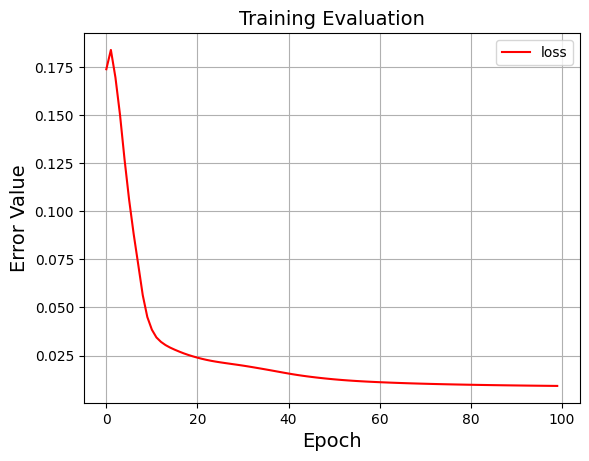

In [78]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Results

In [79]:
predictions = model.forward(x_test)
predictions = predictions.detach().cpu().numpy()

In [80]:
def reverse_ohe(preds):
    ohe = []
    
    for i in preds:
        if i[0] > i[1]:
            ohe.append([1, 0])
        else:
            ohe.append([0, 1])
        
    return ohe

preds = reverse_ohe(predictions)
preds = np.array(preds)
preds.shape

(1418, 2)

In [81]:
print('Accuracy: {}'.format(accuracy_score(preds, y_test)))

Accuracy: 0.9083215796897038


In [82]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60       229
           1       0.90      1.00      0.95      1189

   micro avg       0.91      0.91      0.91      1418
   macro avg       0.95      0.72      0.78      1418
weighted avg       0.92      0.91      0.89      1418
 samples avg       0.91      0.91      0.91      1418

